# Hypothesis Testing with Titanic Dataset

In this notebook, we will cover various hypothesis tests including p-test, t-test, F-test, and chi-squared test. We will use the Titanic dataset to illustrate these tests. Hypothesis testing is a fundamental aspect of statistical analysis and is crucial in data science for making inferences about populations based on sample data.


## 1. Load the Titanic Dataset

We start by loading the Titanic dataset, which contains information about the passengers on the Titanic. The dataset includes features such as age, sex, fare, and survival status.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Exploratory Data Analysis (EDA)

Before conducting hypothesis tests, we perform exploratory data analysis to understand the structure and summary of the data. This includes checking for missing values, understanding the distribution of numerical features, and visualizing categorical features.

In [2]:
# Basic information about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
# Summary statistics of numerical features
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


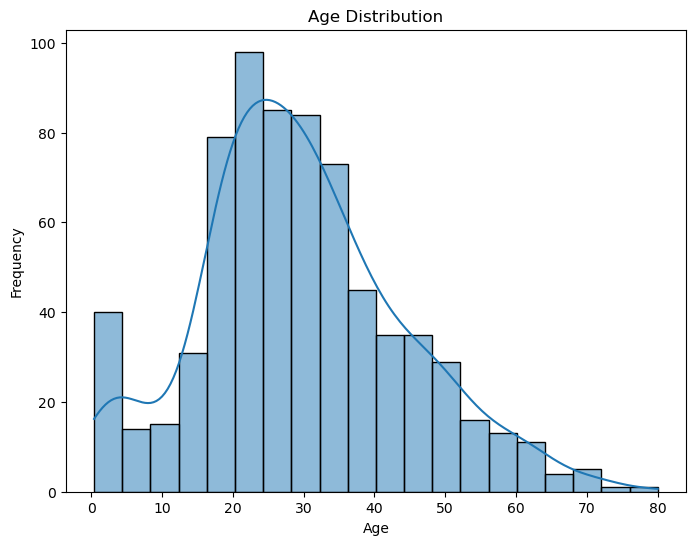

In [4]:
# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(titanic['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

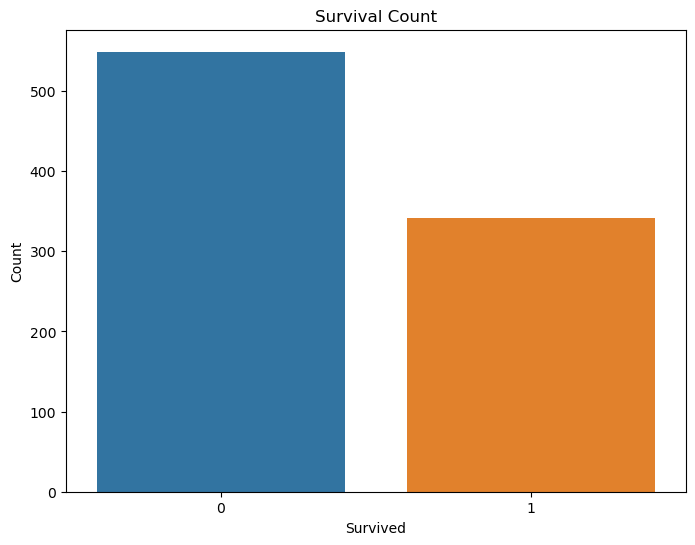

In [5]:
# Count plot of categorical features: Survived
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=titanic)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

## 3. Hypothesis Testing

Hypothesis testing is a method of making statistical decisions using experimental data. It is based on the idea of comparing observed data with a hypothesis whose truth we want to assess. We will cover the following tests:

- **p-test**: Tests for proportion differences.
- **t-test**: Compares the means of two groups.
- **F-test**: Compares the variances of two or more groups.
- **chi-squared test**: Tests the independence of two categorical variables.

### 3.1 p-test

A p-test (or proportion test) is used to determine if there is a significant difference between the proportions of two groups. For example, we can test if the proportion of survivors is different between males and females.

#### Hypotheses:
- Null hypothesis (H0): The proportion of survivors is the same for males and females.
- Alternative hypothesis (H1): The proportion of survivors is different for males and females.

In [6]:
# Contingency table for sex and survival
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [7]:
# Perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
chi2, p

(260.71702016732104, 1.1973570627755645e-58)

The chi-squared test statistic is compared against a critical value from the chi-squared distribution with the appropriate degrees of freedom. The p-value indicates the probability of observing the data assuming the null hypothesis is true.

We can use a chi-squared distribution table to find the critical value for a given significance level (e.g., 0.05) and degrees of freedom. Here, we have 1 degree of freedom (2-1 for sex and 2-1 for survived).

You can refer to the chi-squared distribution table [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm).

### 3.2 t-test

A t-test is used to compare the means of two groups. For example, we can test if the mean age of survivors is different from the mean age of non-survivors.

#### Hypotheses:
- Null hypothesis (H0): The mean age of survivors is the same as the mean age of non-survivors.
- Alternative hypothesis (H1): The mean age of survivors is different from the mean age of non-survivors.

In [8]:
# Mean ages of survivors and non-survivors
mean_age_survived = titanic[titanic['survived'] == 1]['age'].mean()
mean_age_not_survived = titanic[titanic['survived'] == 0]['age'].mean()
mean_age_survived, mean_age_not_survived

In [9]:
# Perform t-test
t_stat, p_val = stats.ttest_ind(titanic[titanic['survived'] == 1]['age'].dropna(),
                               titanic[titanic['survived'] == 0]['age'].dropna())
t_stat, p_val

The t-test statistic is compared against a critical value from the t-distribution with the appropriate degrees of freedom. The p-value indicates the probability of observing the data assuming the null hypothesis is true.

We can use a t-distribution table to find the critical value for a given significance level (e.g., 0.05) and degrees of freedom. The degrees of freedom for a t-test is calculated as the total number of observations in both groups minus 2.

You can refer to the t-distribution table [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3672.htm).

### 3.3 F-test

An F-test is used to compare the variances of two or more groups. For example, we can test if the variance in age is different among the three classes (1st, 2nd, 3rd).

#### Hypotheses:
- Null hypothesis (H0): The variances in age are the same across the three classes.
- Alternative hypothesis (H1): At least one class has a different variance in age.

In [8]:
# Perform Levene's test for equal variances
w_stat, p_val = stats.levene(titanic[titanic['class'] == 'First']['age'].dropna(),
                            titanic[titanic['class'] == 'Second']['age'].dropna(),
                            titanic[titanic['class'] == 'Third']['age'].dropna())
w_stat, p_val

(5.620164466250889, 0.0037869205998203245)

The F-test statistic is compared against a critical value from the F-distribution with the appropriate degrees of freedom. The p-value indicates the probability of observing the data assuming the null hypothesis is true.

We can use an F-distribution table to find the critical value for a given significance level (e.g., 0.05) and degrees of freedom. The degrees of freedom for the numerator is the number of groups minus 1, and for the denominator, it is the total number of observations minus the number of groups.

You can refer to the F-distribution table [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3673.htm).

### 3.4 Chi-squared test

A chi-squared test is used to determine if there is a significant association between two categorical variables. For example, we can test if there is an association between survival status and class.

#### Hypotheses:
- Null hypothesis (H0): There is no association between survival status and class.
- Alternative hypothesis (H1): There is an association between survival status and class.

In [11]:
# Contingency table for class and survival
contingency_table = pd.crosstab(titanic['class'], titanic['survived'])
contingency_table

In [12]:
# Perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
chi2, p

The chi-squared test statistic is compared against a critical value from the chi-squared distribution with the appropriate degrees of freedom. The p-value indicates the probability of observing the data assuming the null hypothesis is true.

We can use a chi-squared distribution table to find the critical value for a given significance level (e.g., 0.05) and degrees of freedom. Here, we have 2 degrees of freedom (3-1 for class and 2-1 for survived).

You can refer to the chi-squared distribution table [here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm).

### 4. Conclusion

In this notebook, we performed hypothesis testing using the Titanic dataset. We conducted p-test, t-test, F-test, and chi-squared test to make inferences about the population based on sample data. Hypothesis testing is a powerful tool in statistics and is widely used in data science for decision making.

Feel free to explore further and apply these tests to other datasets to deepen your understanding.